In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,train_test_split
from sklearn import linear_model, tree, ensemble

In [3]:
df=pd.read_csv('C:\\Users\\Tanu\\Downloads\\heart_data.csv');

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

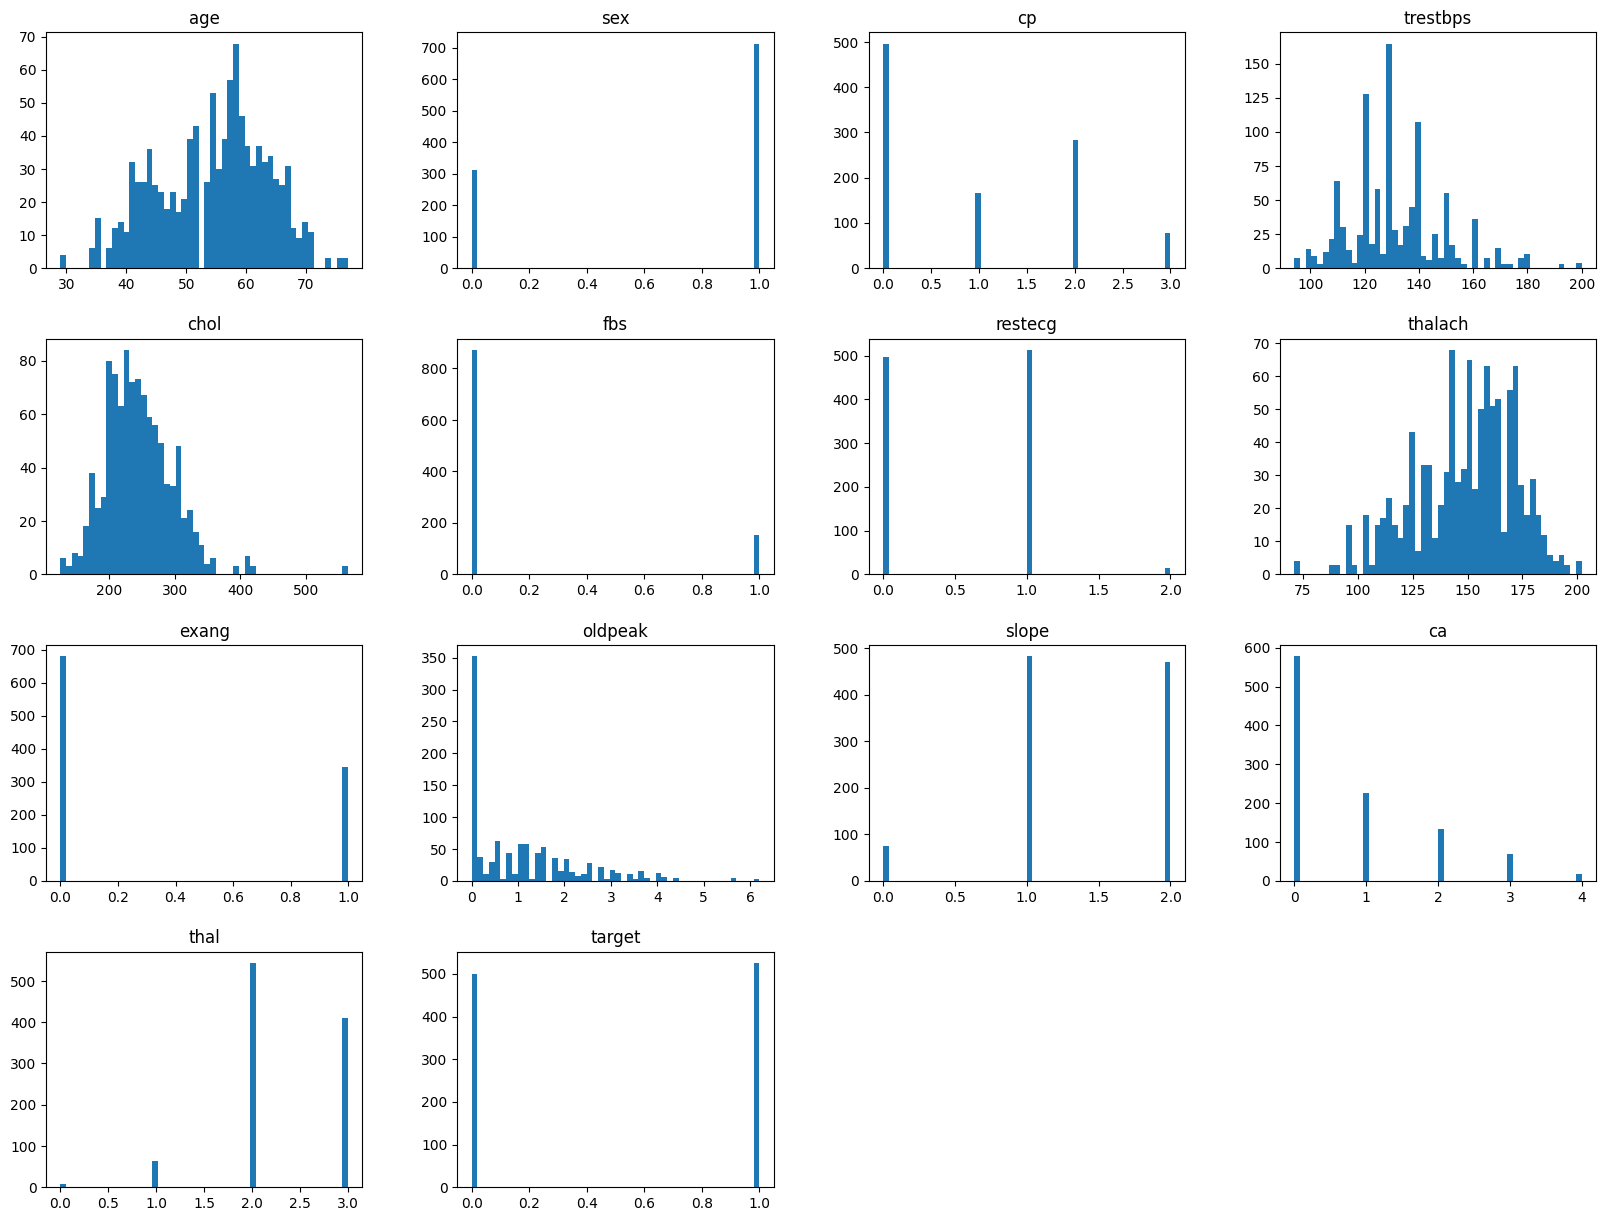

In [9]:
df.hist(bins=50,grid=False,figsize=(20,15))

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#1.How many people have heart disease and how many people doesn't have heart disease?

#getting the values
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

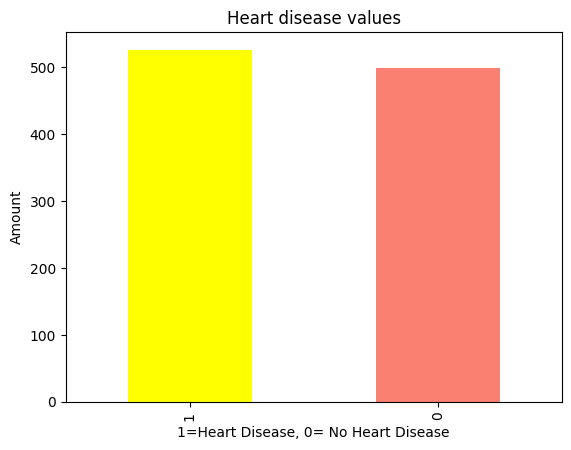

In [12]:
df.target.value_counts().plot(kind='bar', color=["yellow","salmon"])
plt.title("Heart disease values")
plt.xlabel("1=Heart Disease, 0= No Heart Disease")
plt.ylabel("Amount");
                                                 

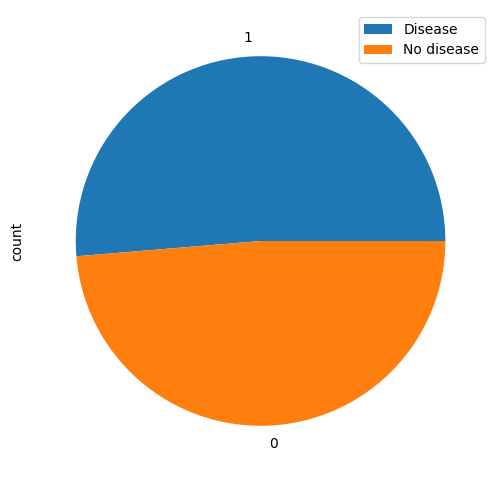

In [13]:
#plotting a pie chart
df.target.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(["Disease","No disease"]);

In [14]:
#0= Female   1=Male
#How many females are inthe dataset
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

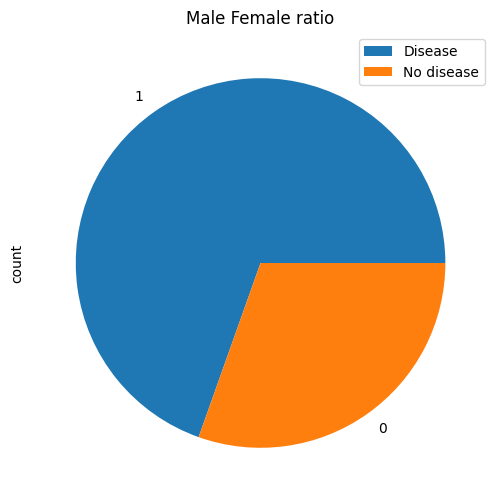

In [15]:
#plotting a pie chart
df.sex.value_counts().plot(kind='pie',figsize=(8,6))
plt.title("Male Female ratio")
plt.legend(["Disease","No disease"]);

In [16]:
# Q2.People of which sex has most heart disease?
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


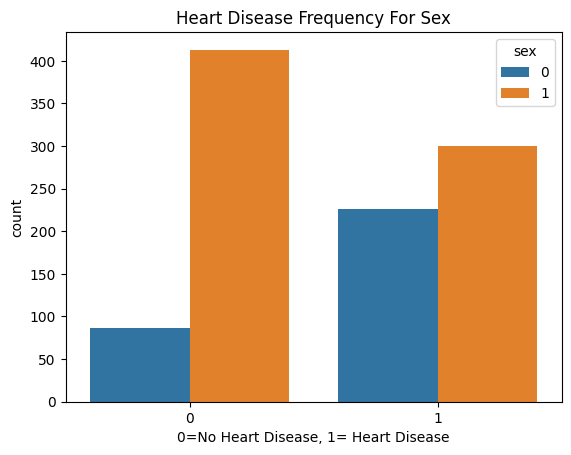

In [17]:
sns.countplot(x='target',data=df,hue='sex')
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0=No Heart Disease, 1= Heart Disease");

In [18]:
#Number of male is more than double in our dataset than female
# More than "45% male" has heart disease and "75% female"

In [19]:
#Q3. People of which sex has which type of chest pain most?

#counting the values for diffrenent chest pain
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

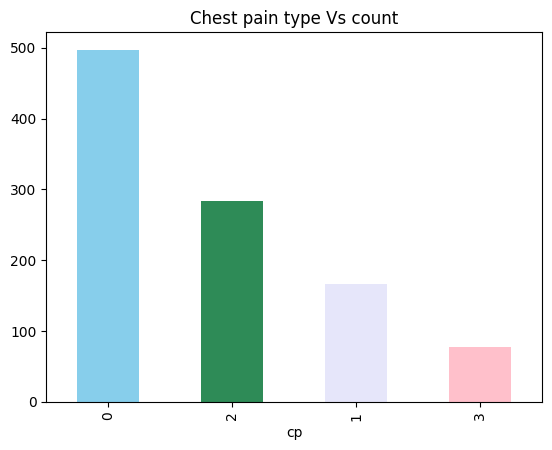

In [20]:
#plotting a bar chart
df.cp.value_counts().plot(kind='bar',color=['skyblue','seagreen','lavender','pink'])
plt.title('Chest pain type Vs count');

In [21]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


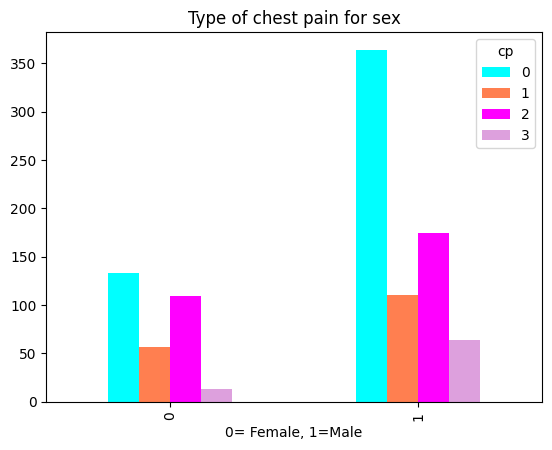

In [22]:
pd.crosstab(df.sex,df.cp).plot(kind='bar',color=['cyan','coral','magenta','plum'])
plt.title("Type of chest pain for sex")
plt.xlabel("0= Female, 1=Male");

In [23]:
#Most of 'male' has 'type 0' chest pain and least of 'male' has type 4 pain
#In case of female 'type 0 and type 2 percentage is almost same.

In [24]:
#Q4. People with which chest pain are most pron to have heart disease?

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


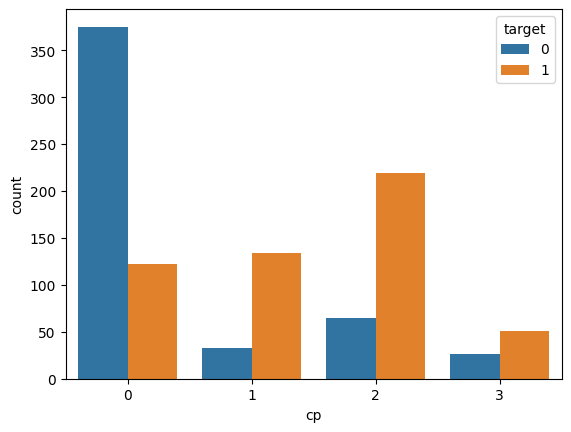

In [25]:
sns.countplot(x='cp', data=df, hue='target');

In [26]:
#Most people who has 'type 0' chest pain has less chance of heart disease.

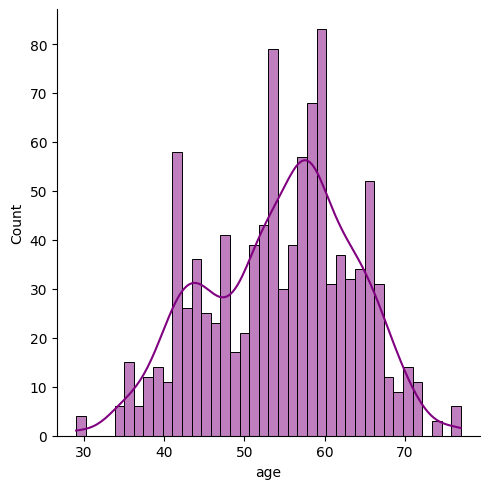

In [27]:
#Create a distribution plot with normal distribution curve

sns.displot(x='age', data=df,bins=40,kde=True,color='purple');

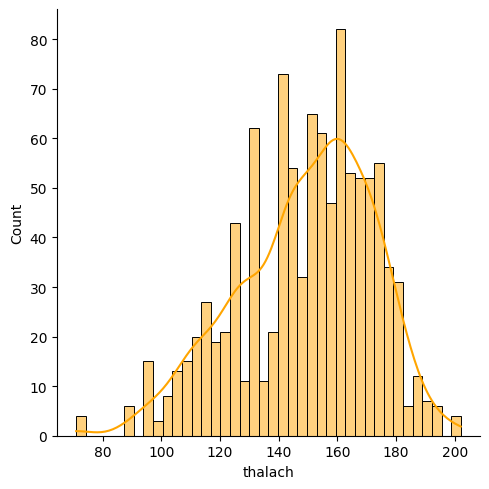

In [28]:
#58-59 year oild people are most in the dataset
# distribution plot for 'Mximum Heart Rate'

sns.displot(x='thalach',data=df,bins=40,kde=True,color='orange');

In [29]:
#Q5.People of which sex has more fasting blood sugar?

pd.crosstab(df.sex,df.fbs)

fbs,0,1
sex,,
0,270,42
1,602,111


Text(0.5, 0, '0= No FBS   1=FBS')

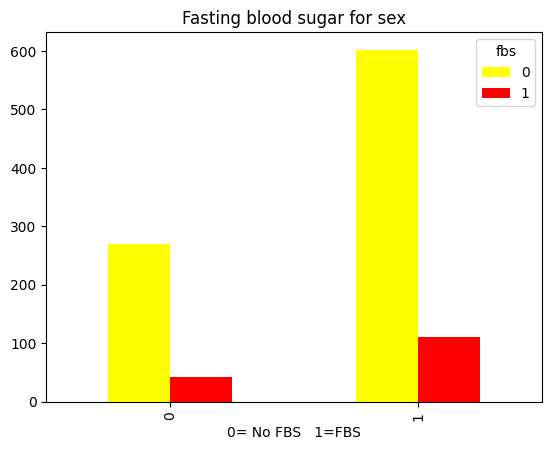

In [30]:
pd.crosstab(df.sex,df.fbs).plot(kind='bar',color=['yellow','red'])
plt.title("Fasting blood sugar for sex")
plt.xlabel("0= No FBS   1=FBS")

In [31]:
#Q6.People of which sex has which type of resting ecg most?
df.restecg.value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

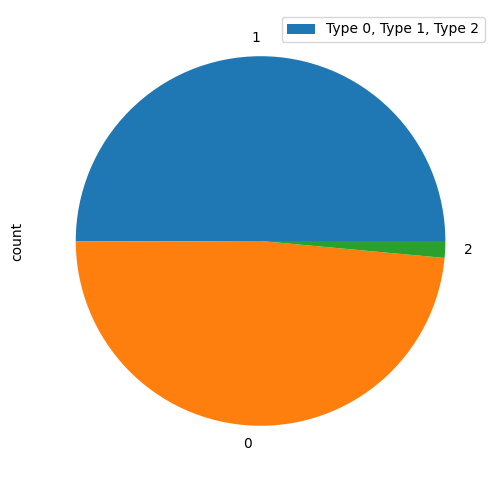

In [32]:
df.restecg.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(["Type 0, Type 1, Type 2"]);

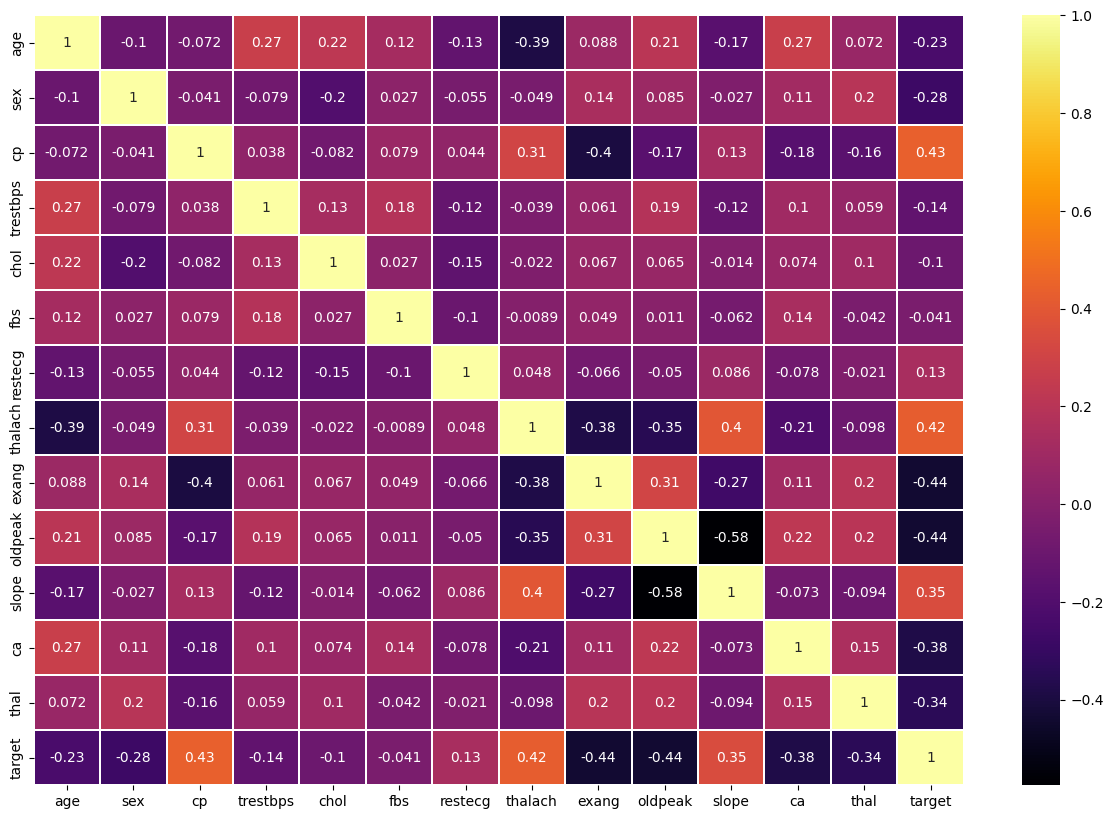

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="inferno")
plt.show()
plt.savefig('correlationfigure')

In [34]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.8249027237354085
Testing Sensitivity for Logistic Regression: 0.8545454545454545
Testing Specificity for Logistic Regression: 0.8027210884353742
Testing Precision for Logistic Regression: 0.7642276422764228


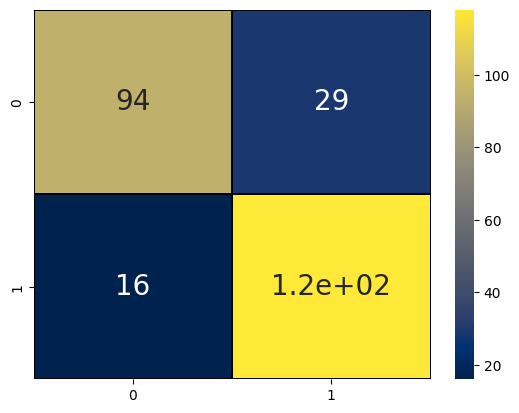

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='cividis',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       123
           1       0.80      0.88      0.84       134

    accuracy                           0.82       257
   macro avg       0.83      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



Testing Accuracy for Decision Tree: 0.914396887159533
Testing Sensitivity for Decision Tree: 0.9316239316239316
Testing Specificity for Decision Tree: 0.9
Testing Precision for Decision Tree: 0.8861788617886179


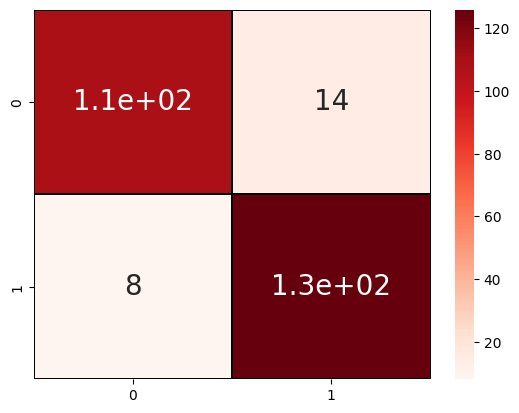

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='Reds',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.90      0.94      0.92       134

    accuracy                           0.91       257
   macro avg       0.92      0.91      0.91       257
weighted avg       0.92      0.91      0.91       257



Testing Accuracy for Random Forest: 0.9922178988326849
Testing Sensitivity for Random Forest: 0.984
Testing Specificity for Random Forest: 1.0
Testing Precision for Random Forest: 1.0


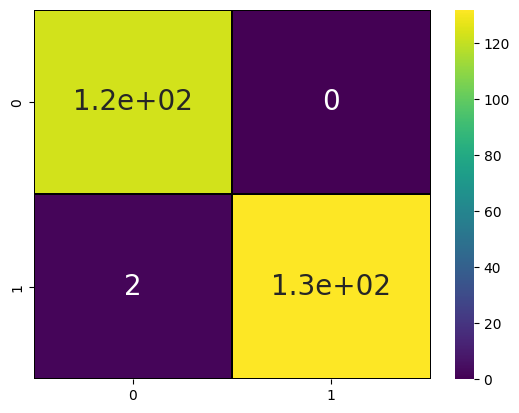

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='viridis',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [40]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.99      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [44]:
input=(58,1,2,140,211,1,0,165,0,0,2,0,2)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=rfc.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
input=(54,1,0,120,188,0,1,113,1,1.4,1,1,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
